In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import classification_report,confusion_matrix

In [2]:
df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [4]:
df.corr()['price'].sort_values()

zipcode         -0.053402
id              -0.016772
long             0.022036
condition        0.036056
yr_built         0.053953
sqft_lot15       0.082845
sqft_lot         0.089876
yr_renovated     0.126424
floors           0.256804
waterfront       0.266398
lat              0.306692
bedrooms         0.308787
sqft_basement    0.323799
view             0.397370
bathrooms        0.525906
sqft_living15    0.585241
sqft_above       0.605368
grade            0.667951
sqft_living      0.701917
price            1.000000
Name: price, dtype: float64

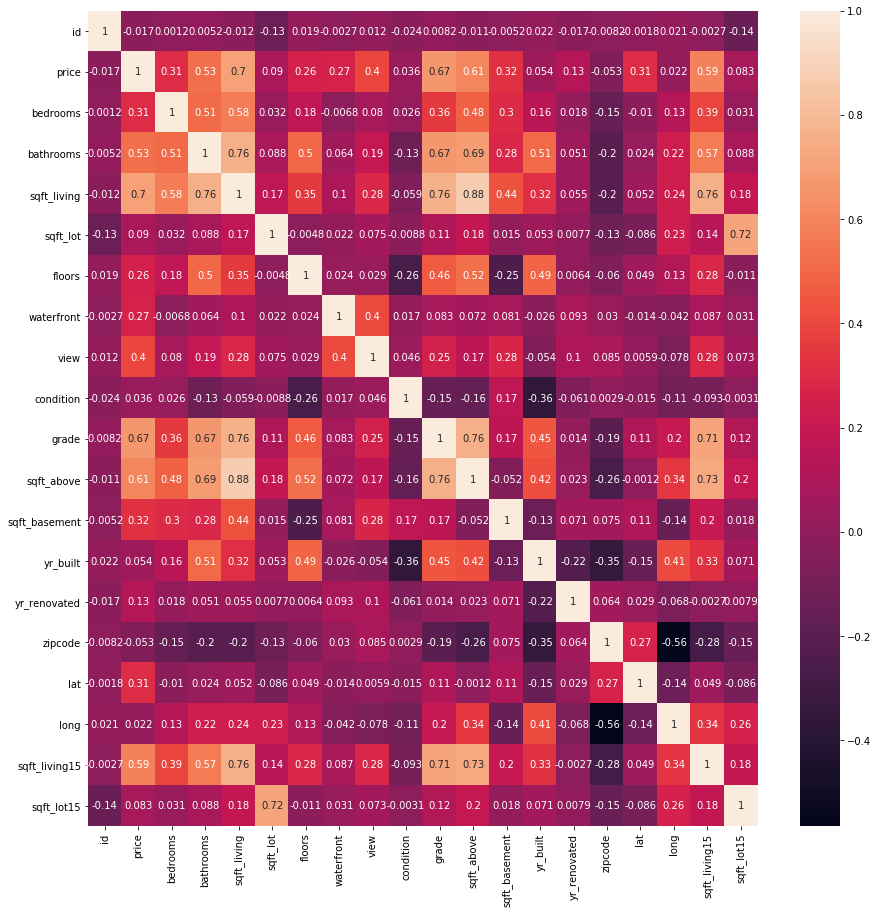

In [5]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True)

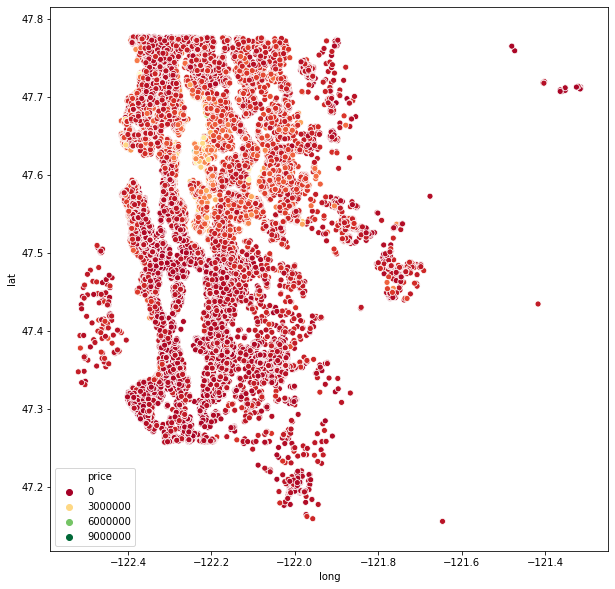

In [6]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=df,x='long',y='lat',hue='price',palette='RdYlGn')

In [7]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [8]:
df['date'] = pd.to_datetime(df['date'])

In [9]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [10]:
def year_ext(date):
    return date.year

In [11]:
df['year'] = df['date'].apply(lambda date: date.year)

In [12]:
df['month'] = df['date'].apply(lambda date: date.month)

In [13]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'year', 'month'],
      dtype='object')

In [14]:
df = df.drop('date',axis=1)

In [15]:
df.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'year', 'month'],
      dtype='object')

In [16]:
df = df.drop('id',axis=1)

In [17]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'year', 'month'],
      dtype='object')

In [18]:
X = df.drop('price',axis=1).values
y = df['price'].values

In [19]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'year', 'month'],
      dtype='object')

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [22]:
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [24]:
model = Sequential()

model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))

model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [25]:
model.fit(X_train,y_train,
          validation_data=(X_test,y_test),
          batch_size=128,epochs=400)

Epoch 1/400
119/119 [==============================] - 0s 3ms/step - loss: 430216282112.0000 - val_loss: 418738241536.0000
Epoch 2/400
119/119 [==============================] - 0s 1ms/step - loss: 423480590336.0000 - val_loss: 391156563968.0000
Epoch 3/400
119/119 [==============================] - 0s 1ms/step - loss: 294883852288.0000 - val_loss: 135224713216.0000
Epoch 4/400
119/119 [==============================] - 0s 1ms/step - loss: 104984813568.0000 - val_loss: 96002686976.0000
Epoch 5/400
119/119 [==============================] - 0s 2ms/step - loss: 97342955520.0000 - val_loss: 92700483584.0000
Epoch 6/400
119/119 [==============================] - 0s 1ms/step - loss: 93839548416.0000 - val_loss: 89357205504.0000
Epoch 7/400
119/119 [==============================] - 0s 1ms/step - loss: 90177191936.0000 - val_loss: 85707169792.0000
Epoch 8/400
119/119 [==============================] - 0s 1ms/step - loss: 86298509312.0000 - val_loss: 81832542208.0000
Epoch 9/400
119/119 [====

119/119 [==============================] - 0s 2ms/step - loss: 30285076480.0000 - val_loss: 29923870720.0000
Epoch 69/400
119/119 [==============================] - 0s 2ms/step - loss: 30260627456.0000 - val_loss: 29887641600.0000
Epoch 70/400
119/119 [==============================] - 0s 1ms/step - loss: 30270001152.0000 - val_loss: 30168832000.0000
Epoch 71/400
119/119 [==============================] - 0s 2ms/step - loss: 30187229184.0000 - val_loss: 29711099904.0000
Epoch 72/400
119/119 [==============================] - 0s 2ms/step - loss: 30034108416.0000 - val_loss: 29707444224.0000
Epoch 73/400
119/119 [==============================] - 0s 1ms/step - loss: 30014234624.0000 - val_loss: 29828632576.0000
Epoch 74/400
119/119 [==============================] - 0s 1ms/step - loss: 29952899072.0000 - val_loss: 29721747456.0000
Epoch 75/400
119/119 [==============================] - 0s 1ms/step - loss: 29895204864.0000 - val_loss: 29627074560.0000
Epoch 76/400
119/119 [===============

Epoch 135/400
119/119 [==============================] - 0s 2ms/step - loss: 27757463552.0000 - val_loss: 27643295744.0000
Epoch 136/400
119/119 [==============================] - 0s 1ms/step - loss: 27694120960.0000 - val_loss: 27676190720.0000
Epoch 137/400
119/119 [==============================] - 0s 2ms/step - loss: 27624742912.0000 - val_loss: 27700084736.0000
Epoch 138/400
119/119 [==============================] - 0s 2ms/step - loss: 27644532736.0000 - val_loss: 27535224832.0000
Epoch 139/400
119/119 [==============================] - 0s 1ms/step - loss: 27592701952.0000 - val_loss: 27916521472.0000
Epoch 140/400
119/119 [==============================] - 0s 1ms/step - loss: 27584169984.0000 - val_loss: 27534706688.0000
Epoch 141/400
119/119 [==============================] - 0s 1ms/step - loss: 27548960768.0000 - val_loss: 27765116928.0000
Epoch 142/400
119/119 [==============================] - 0s 1ms/step - loss: 27536842752.0000 - val_loss: 27770630144.0000
Epoch 143/400
11

119/119 [==============================] - 0s 1ms/step - loss: 26361528320.0000 - val_loss: 26473564160.0000
Epoch 202/400
119/119 [==============================] - 0s 1ms/step - loss: 26350735360.0000 - val_loss: 26165747712.0000
Epoch 203/400
119/119 [==============================] - 0s 2ms/step - loss: 26377881600.0000 - val_loss: 26087763968.0000
Epoch 204/400
119/119 [==============================] - 0s 2ms/step - loss: 26334423040.0000 - val_loss: 27155253248.0000
Epoch 205/400
119/119 [==============================] - 0s 1ms/step - loss: 26288889856.0000 - val_loss: 26004498432.0000
Epoch 206/400
119/119 [==============================] - 0s 1ms/step - loss: 26290208768.0000 - val_loss: 26293129216.0000
Epoch 207/400
119/119 [==============================] - 0s 1ms/step - loss: 26320865280.0000 - val_loss: 26057072640.0000
Epoch 208/400
119/119 [==============================] - 0s 1ms/step - loss: 26316351488.0000 - val_loss: 26210177024.0000
Epoch 209/400
119/119 [=======

119/119 [==============================] - 0s 1ms/step - loss: 25402994688.0000 - val_loss: 25215930368.0000
Epoch 268/400
119/119 [==============================] - 0s 1ms/step - loss: 25517611008.0000 - val_loss: 25498523648.0000
Epoch 269/400
119/119 [==============================] - 0s 1ms/step - loss: 25304592384.0000 - val_loss: 25083080704.0000
Epoch 270/400
119/119 [==============================] - 0s 1ms/step - loss: 25289054208.0000 - val_loss: 25094922240.0000
Epoch 271/400
119/119 [==============================] - 0s 1ms/step - loss: 25239648256.0000 - val_loss: 25112553472.0000
Epoch 272/400
119/119 [==============================] - 0s 1ms/step - loss: 25290938368.0000 - val_loss: 25346756608.0000
Epoch 273/400
119/119 [==============================] - 0s 1ms/step - loss: 25202300928.0000 - val_loss: 24939114496.0000
Epoch 274/400
119/119 [==============================] - 0s 1ms/step - loss: 25211967488.0000 - val_loss: 25121437696.0000
Epoch 275/400
119/119 [=======

119/119 [==============================] - 0s 3ms/step - loss: 24563066880.0000 - val_loss: 24574035968.0000
Epoch 334/400
119/119 [==============================] - 0s 2ms/step - loss: 24496119808.0000 - val_loss: 24639113216.0000
Epoch 335/400
119/119 [==============================] - 0s 1ms/step - loss: 24471400448.0000 - val_loss: 24832845824.0000
Epoch 336/400
119/119 [==============================] - 0s 1ms/step - loss: 24464779264.0000 - val_loss: 24678451200.0000
Epoch 337/400
119/119 [==============================] - 0s 1ms/step - loss: 24416380928.0000 - val_loss: 24569290752.0000
Epoch 338/400
119/119 [==============================] - 0s 1ms/step - loss: 24470829056.0000 - val_loss: 24603873280.0000
Epoch 339/400
119/119 [==============================] - 0s 1ms/step - loss: 24352851968.0000 - val_loss: 24800126976.0000
Epoch 340/400
119/119 [==============================] - 0s 1ms/step - loss: 24346836992.0000 - val_loss: 24658100224.0000
Epoch 341/400
119/119 [=======

119/119 [==============================] - 0s 2ms/step - loss: 23898124288.0000 - val_loss: 24425781248.0000
Epoch 400/400
119/119 [==============================] - 0s 3ms/step - loss: 23936552960.0000 - val_loss: 24093427712.0000


In [26]:
loss_df = pd.DataFrame(model.history.history)

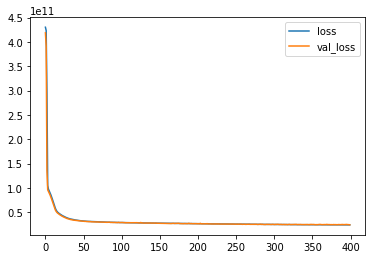

In [27]:
loss_df.plot()

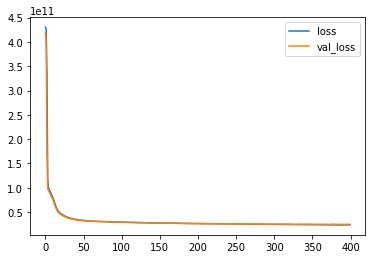

In [28]:
loss_df.plot()

In [28]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,explained_variance_score

In [29]:
preds = model.predict(X_test)

In [30]:
preds

array([[363146.12],
       [579916.06],
       [557806.3 ],
       ...,
       [403833.06],
       [509147.97],
       [656731.44]], dtype=float32)

In [31]:
explained_variance_score(y_test,preds)

0.8185722922786529

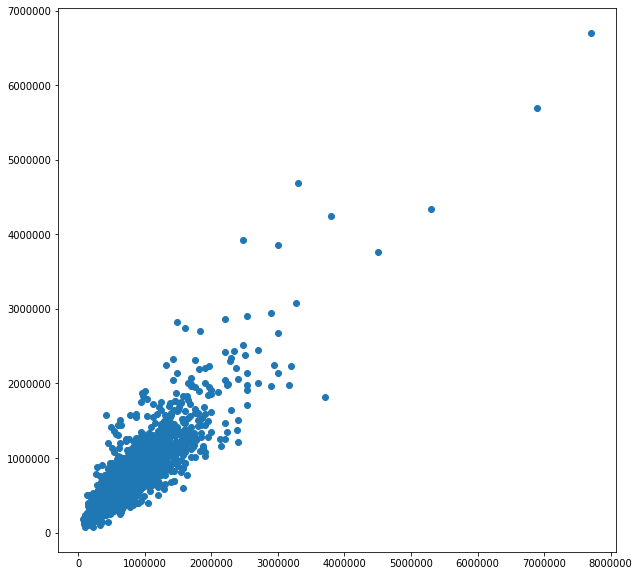

In [32]:
plt.figure(figsize=(10,10))
plt.scatter(y_test,preds)

In [33]:
sing = df.drop('price',axis=1).iloc[0]

In [34]:
sing

bedrooms             3.0000
bathrooms            1.0000
sqft_living       1180.0000
sqft_lot          5650.0000
floors               1.0000
waterfront           0.0000
view                 0.0000
condition            3.0000
grade                7.0000
sqft_above        1180.0000
sqft_basement        0.0000
yr_built          1955.0000
yr_renovated         0.0000
zipcode          98178.0000
lat                 47.5112
long              -122.2570
sqft_living15     1340.0000
sqft_lot15        5650.0000
year              2014.0000
month               10.0000
Name: 0, dtype: float64

In [35]:
sing = sing.values.reshape(-1,20)

In [36]:
sing = scaler.transform(sing)

In [37]:
sing

array([[0.2       , 0.08      , 0.08376422, 0.00310751, 0.        ,
        0.        , 0.        , 0.5       , 0.4       , 0.10785619,
        0.        , 0.47826087, 0.        , 0.89393939, 0.57149751,
        0.21760797, 0.16193426, 0.00582059, 0.        , 0.81818182]])

In [38]:
model.predict(sing)

array([[258300.11]], dtype=float32)

In [ ]:
print(classification_report())